# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Evi Afiyatus Solihah
- **Email:** eviafiyatuss@gmail.com
- **ID Dicoding:** MC299D5X1752


## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah peminjaman sepeda pada hari kerja, akhir pekan, dan hari libur?
- Bagaimana pola peminjaman berdasarkan kategori waktu (jam), dan apakah frekuensi peminjaman selalu berbanding lurus dengan total jumlah peminjaman di setiap kategori waktu?

## Import Semua Packages/Library yang Digunakan

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Gathering dataset day.csv

In [81]:
day_df = pd.read_csv("https://raw.githubusercontent.com/viapiyaaa/Bike-sharing-dataset/refs/heads/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Gathering dataset hour.csv

In [82]:
hour_df = pd.read_csv("http://raw.githubusercontent.com/viapiyaaa/Bike-sharing-dataset/refs/heads/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari dua file, yaitu **day.csv** dan **hour.csv**. Kedua tabel memiliki isi yang hampir sama, dengan perbedaan utama pada **hour.csv**, yang memiliki kolom **hr** (jam) untuk menunjukkan data peminjaman sepeda per jam. Data harian dapat menunjukkan tren penggunaan jangka panjang, sementara data per jam mengungkap pola peminjaman dalam satu hari. Selain itu terdapat data berupa faktor-faktor yang memengaruhi peminjaman sepeda untuk menganalisis tren penggunaan, memahami pola peminjaman, serta memprediksi kebutuhan sepeda di masa depan.

### Assessing Data

**Assessing day.csv**

Menampilkan Informasi untuk day.csv

In [83]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa apakah ada missing value dan menjumlahkannya jika ada

In [84]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa apakah ada duplikasi data

In [85]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Assessing hour.csv**

Menampilkan Informasi untuk hour.csv

In [86]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa apakah ada missing value dan menjumlahkannya jika ada

In [87]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa apakah ada duplikasi data

In [88]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat Missing value, duplikat data, ataupun inacurrate value

### Cleaning Data

Mengonversi tipe data dteday menjadi datetime pada dataset day_df

In [89]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Mengonversi tipe data dteday menjadi datetime pada dastaset hour_df

In [90]:
hour_df["dteday"] = pd.to_datetime(day_df["dteday"])

Memeriksa apakah berhasil mengonversi menjadi tipe data datetime pada dataset day_df

In [91]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memeriksa apakah berhasil mengonversi menjadi tipe data datetime pada dataset hour_df

In [92]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Hanya melakukan konversi masing-masing kolom dteday pada file day.csv dan hour.csv menjadi datetime tanpa banyak melakukan pembersihan data.

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore day.csv**

Menampilkan ringkasan statistik dari dataset day_df

In [93]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan ringkasan statistik dari dataset day_df kolom holiday, weekday, dan workingday

In [94]:
day_df[["holiday", "weekday", "workingday"]].describe()

,holiday,weekday,workingday
count,731.000000,731.000000,731.000000
mean,0.028728,2.997264,0.683995
std,0.167155,2.004787,0.465233
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000
75%,0.000000,5.000000,1.000000
max,1.000000,6.000000,1.000000


Melihat nilai unik dari kolom holiday, weekday, dan workingday

In [95]:
print("Unique values in holiday:", day_df["holiday"].unique())
print("Unique values in weekday:", (day_df["weekday"].unique()))
print("Unique values in workingday:", day_df["workingday"].unique())

Unique values in holiday: [0 1]
Unique values in weekday: [6 0 1 2 3 4 5]
Unique values in workingday: [0 1]


Mengklasifikasikan jenis hari dalam dataset day_df

In [96]:
def classify_day(row):
    if row["holiday"] == 1:
        return "Holiday"
    elif row["weekday"] in [0, 6]:  # Minggu (0) dan Sabtu (6)
        return "Weekend"
    else:
        return "Workday"

day_df["day_type"] = day_df.apply(classify_day, axis=1)

Melakukan agregasi statistik pada dataset day_df dengan mengelompokkan data berdasarkan day_type dan menghitung total, rata-rata, median, serta standar deviasi jumlah peminjaman (cnt).

In [97]:
day_df.groupby("day_type").agg(
    total_peminjaman=("cnt", "sum"),
    rata_rata_peminjaman=("cnt", "mean"),
    median_peminjaman=("cnt", "median"),
    std_peminjaman=("cnt", "std")
)

,total_peminjaman,rata_rata_peminjaman,median_peminjaman,std_peminjaman
day_type,,,,
Holiday,78435,3735.000000,3351.0,2103.350660
Weekend,921834,4389.685714,4467.5,2042.527458
Workday,2292410,4584.820000,4582.0,1878.415583


Memvisualisasikan distribusi peminjaman sepeda berdasarkan jenis hari (workday, weekend, dan holiday) menggunakan boxplot.

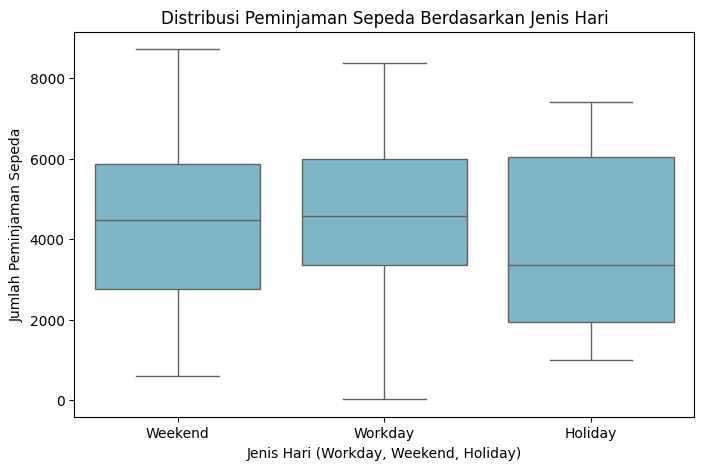

In [98]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x="day_type", y="cnt", hue="day_type", palette=["#72BCD4", "#72BCD4", "#72BCD4"])

plt.xlabel("Jenis Hari (Workday, Weekend, Holiday)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Jenis Hari")
plt.show()

**Explore hour.csv**

Menampilkan ringkasan statistik dari dataset hour_df

In [99]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menampilkan ringkasan statistik dari dataset hour_df kolom hr

In [100]:
hour_df[["hr"]].describe()

,hr
count,17379.000000
mean,11.546752
std,6.914405
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


Menampilkan semua nilai unik yang terdapat dalam kolom hr pada Dataset hour_df

In [101]:
print(hour_df["hr"].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Mengelompokkan jam ke dalam kategori waktu tertentu (Dini Hari, Pagi, Siang, Sore, dan Malam)

In [102]:
bins = [0, 6, 12, 16, 19, 24]
labels = ["Dini Hari", "Pagi", "Siang", "Sore", "Malam"]

hour_df["time_category"] = pd.cut(hour_df["hr"], bins=bins, labels=labels, right=False)

print(hour_df[["hr", "time_category"]].head(10))

   hr time_category
0   0     Dini Hari
1   1     Dini Hari
2   2     Dini Hari
3   3     Dini Hari
4   4     Dini Hari
5   5     Dini Hari
6   6          Pagi
7   7          Pagi
8   8          Pagi
9   9          Pagi



Melakukan agregasi statistik pada dataset hour_df dengan mengelompokkan data berdasarkan kategori waktu dan menghitung total, rata-rata, serta frekuensi peminjaman (cnt).

In [103]:
hour_df.groupby("time_category", observed=False).agg(
    total_peminjaman=("cnt", "sum"),
    rata_rata_peminjaman=("cnt", "mean"),
    frekuensi_peminjaman=("cnt", "count")
)

,total_peminjaman,rata_rata_peminjaman,frekuensi_peminjaman
time_category,,,
Dini Hari,106509,24.908559,4276
Pagi,907319,208.100688,4360
Siang,728134,249.788679,2915
Sore,874380,399.625229,2188
Malam,676337,185.806868,3640


Membuat visualisasi distribusi peminjaman sepeda berdasarkan kategori waktu dengan box plot.

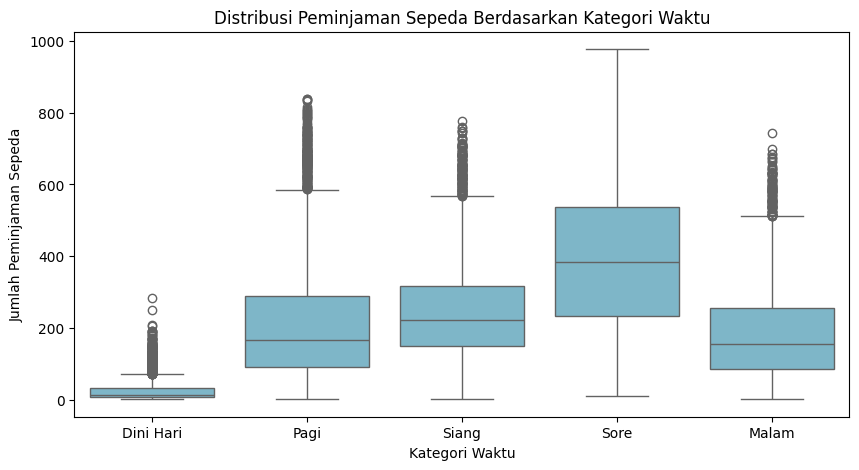

In [104]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=hour_df, x="time_category", y="cnt", hue="time_category", palette=["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"], legend=False)
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Kategori Waktu")
plt.show()

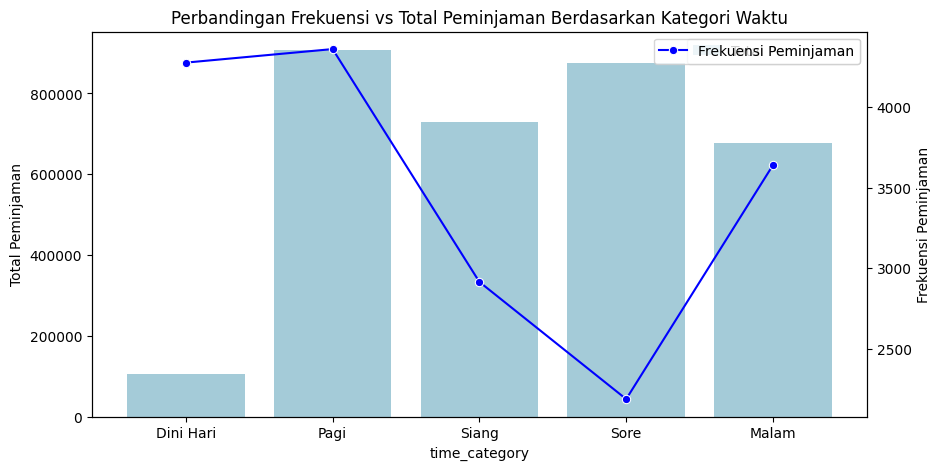

In [105]:
hourly_category_stats = hour_df.groupby("time_category", observed=False).agg(
    total_peminjaman=("cnt", "sum"),
    frekuensi_peminjaman=("cnt", "count")
).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=hourly_category_stats, x="time_category", y="total_peminjaman", color="#72BCD4", label="Total Peminjaman", alpha=0.7)

ax2 = ax.twinx()
sns.lineplot(data=hourly_category_stats, x="time_category", y="frekuensi_peminjaman", marker="o", color="blue", label="Frekuensi Peminjaman", ax=ax2)

ax.set_ylabel("Total Peminjaman")
ax2.set_ylabel("Frekuensi Peminjaman")
plt.title("Perbandingan Frekuensi vs Total Peminjaman Berdasarkan Kategori Waktu")
plt.show()

**Insight:**
- **Berdasarkan Boxplot Distribusi Peminjaman Sepeda Berdasarkan Jenis Har**i
1. Distribusi peminjaman sepeda pada Workday, Weekend, dan Holiday tidak memiliki perbedaan yang terlalu mencolok, dimana semua jenis hari memiliki rentang data yang hampir sama.
2. Median Workday dan Weekend lebih tinggi dibandingkan Holiday yang menunjukkan bahwa pada hari kerja dan akhir pekan, peminjaman sepeda lebih sering digunakan.
3. Interquartile range (IQR) yang lebar menunjukkan variasi peminjaman yang besar. Rentang data lebih luas pada Weekend dan Workday, menandakan perbedaan signifikan dalam jumlah peminjaman antar hari.
4. Median Holiday lebih rendah dibandingkan Workday dan Weekend, dimana ini bisa menunjukkan bahwa pada hari libur, penggunaan sepeda lebih rendah, mungkin karena lebih sedikit orang yang bepergian ke kantor/sekolah.

- **Berdasarkan Boxplot Distribusi Peminjaman Sepeda Berdasarkan Kategori Waktu**
1. Peminjaman sepeda meningkat seiring waktu, dimana dini hari memiliki jumlah peminjaman paling rendah dengan rentang interquartile (IQR) yang kecil Kemudian peminjaman mulai meningkat di Pagi dan Siang, dengan distribusi data yang lebih lebar. Untuk puncak peminjaman terjadi pada Sore, terlihat dari median tertinggi dan IQR paling besar.  
2. Median peminjaman tertinggi ada di Sore, menunjukkan bahwa lebih banyak orang menggunakan sepeda pada waktu ini.  Dan Variasi peminjaman (IQR) lebih luas, menandakan perbedaan jumlah peminjaman yang cukup signifikan antar waktunya.  
3. Jumlah peminjaman sepeda pada dini hari paling rendah dengan median kecil dan rentang data sempit, menunjukkan penggunaan yang jarang dan stabil. Namun, banyaknya pencilan mengindikasikan lonjakan peminjaman pada momen tertentu.
4. Peminjaman sepeda relatif tinggi pada pagi, siang, dan malam, dengan distribusi yang cukup mirip antara pagi dan siang serta median yang lebih tinggi dibanding dini hari. Meskipun lebih rendah dibanding sore, jumlah peminjaman pada malam tetap signifikan. Selain itu, banyaknya outlier di semua kategori waktu menunjukkan adanya fluktuasi peminjaman yang cukup ekstrem pada beberapa waktu tertentu.

- **Berdasarkan Dual-Axis Chart Perbandingan Frekuensi vs Total Peminjaman Berdasarkan Kategori Waktu**
1. Pagi dan Sore memiliki total peminjaman tertinggi, yang menunjukkan bahwa waktu ini paling banyak digunakan untuk menyewa sepeda.  
2. Siang dan Malam memiliki total peminjaman yang lebih rendah dibanding Pagi dan Sore, namun tetap cukup signifikan.  
3. Dini Hari memiliki total peminjaman paling sedikit, menunjukkan penggunaan sepeda sangat rendah pada waktu ini.  
4. Frekuensi peminjaman menunjukkan pola yang berbeda dengan total peminjaman, dengan puncak pada Pagi dan Malam serta penurunan drastis pada Sore.  
5. Frekuensi peminjaman terendah terjadi pada Sore, meskipun total peminjaman cukup tinggi, menunjukkan bahwa peminjaman pada Sore mungkin dilakukan dalam jumlah besar tetapi lebih jarang terjadi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi jumlah peminjaman sepeda pada hari kerja, akhir pekan, dan hari libur?

Mengambil sampel acak dari DataFrame day

In [106]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460,Workday
175,176,2011-06-25,3,0,6,0,6,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202,Weekend
410,411,2012-02-15,1,1,2,0,3,1,1,0.348333,0.351629,0.531250,0.181600,141,4028,4169,Workday
267,268,2011-09-25,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1544,3466,5010,Weekend
550,551,2012-07-04,3,1,7,1,3,0,1,0.789167,0.732337,0.538750,0.134950,2562,4841,7403,Holiday
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714,Weekend
129,130,2011-05-10,2,0,5,0,2,1,1,0.532500,0.522721,0.489167,0.115671,694,4109,4803,Workday
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787,Weekend
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249,Weekend
281,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,3114,5511,Weekend


Mengklasifikasikan jenis hari dalam dataset day_df

In [107]:
def classify_day(row):
    if row["holiday"] == 1:
        return "Holiday"
    elif row["weekday"] in [0, 6]:  # Minggu (0) dan Sabtu (6)
        return "Weekend"
    else:
        return "Workday"

day_df["day_type"] = day_df.apply(classify_day, axis=1)

Menghitung total jumlah peminjaman sepeda (cnt) berdasarkan jenis hari (day_type) dalam DataFrame day_df

In [108]:
day_df.groupby("day_type")["cnt"].sum()

,cnt
day_type,
Holiday,78435
Weekend,921834
Workday,2292410


Visualisasi distribusi jumlah peminjaman sepeda (cnt) berdasarkan jenis hari (day_type)

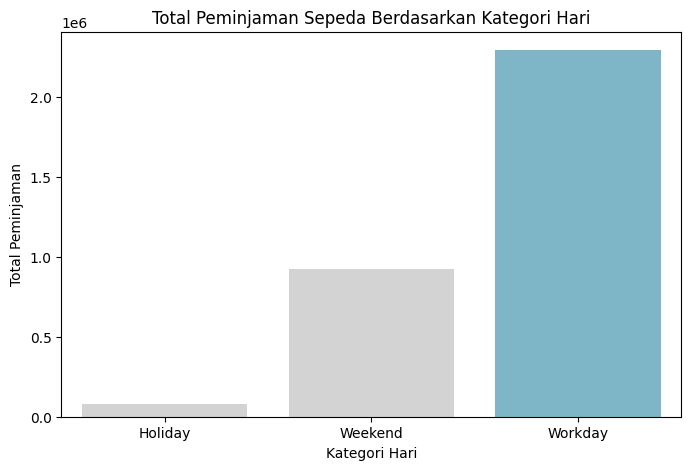

In [109]:
category_count = day_df.groupby("day_type")["cnt"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="day_type", y="cnt", data=category_count, hue="day_type", palette=["#D3D3D3", "#D3D3D3", "#72BCD4"], legend=False)

plt.title("Total Peminjaman Sepeda Berdasarkan Kategori Hari")
plt.xlabel("Kategori Hari")
plt.ylabel("Total Peminjaman")
plt.show()

Menghitung rata-rata peminjaman sepeda (cnt) berdasarkan jenis hari (day_type) dalam DataFrame day_df

In [110]:
day_df.groupby("day_type")["cnt"].mean()

,cnt
day_type,
Holiday,3735.000000
Weekend,4389.685714
Workday,4584.820000


Visualisasi distribusi rata-rata peminjaman sepeda (cnt) berdasarkan jenis hari (day_type)

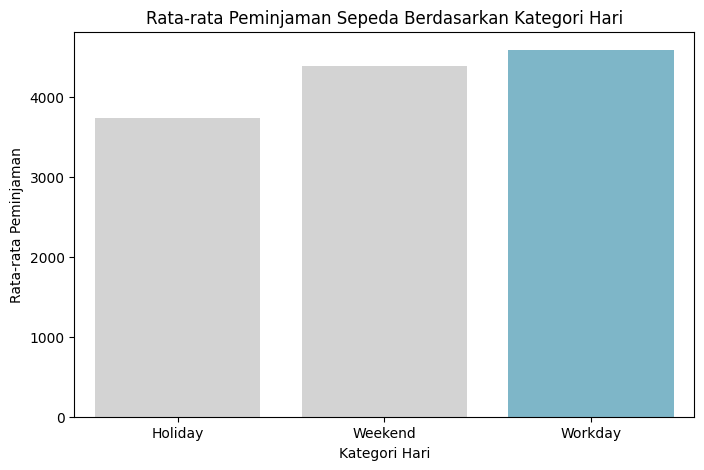

In [111]:
category_avg = day_df.groupby("day_type")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="day_type", y="cnt", data=category_avg, hue="day_type", palette=["#D3D3D3", "#D3D3D3", "#72BCD4"], legend=False)

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kategori Hari")
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

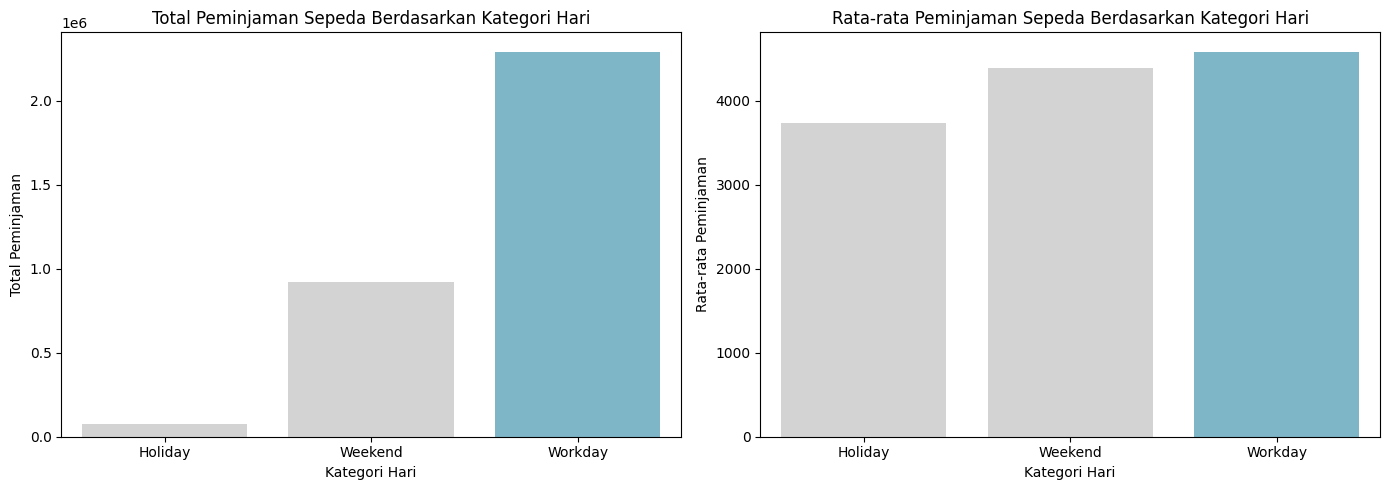

In [112]:
category_count = day_df.groupby("day_type")["cnt"].sum().reset_index()
category_avg = day_df.groupby("day_type")["cnt"].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(ax=axes[0], x="day_type", y="cnt", data=category_count, hue="day_type", palette=["#D3D3D3", "#D3D3D3", "#72BCD4"], legend=False)
axes[0].set_title("Total Peminjaman Sepeda Berdasarkan Kategori Hari")
axes[0].set_xlabel("Kategori Hari")
axes[0].set_ylabel("Total Peminjaman")

sns.barplot(ax=axes[1], x="day_type", y="cnt", data=category_avg, hue="day_type", palette=["#D3D3D3", "#D3D3D3", "#72BCD4"], legend=False)
axes[1].set_title("Rata-rata Peminjaman Sepeda Berdasarkan Kategori Hari")
axes[1].set_xlabel("Kategori Hari")
axes[1].set_ylabel("Rata-rata Peminjaman")

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman berdasarkan kategori waktu (jam), dan apakah frekuensi peminjaman selalu berbanding lurus dengan total jumlah peminjaman di setiap kategori waktu?

Mengelompokkan jam (hr) ke dalam kategori waktu tertentu menggunakan teknik binning.

In [113]:
bins = [0, 6, 12, 16, 19, 24]
labels = ["Dini Hari", "Pagi", "Siang", "Sore", "Malam"]

hour_df["time_category"] = pd.cut(hour_df["hr"], bins=bins, labels=labels, right=False)

print(hour_df[["hr", "time_category"]].head(10))

   hr time_category
0   0     Dini Hari
1   1     Dini Hari
2   2     Dini Hari
3   3     Dini Hari
4   4     Dini Hari
5   5     Dini Hari
6   6          Pagi
7   7          Pagi
8   8          Pagi
9   9          Pagi


Mengelompokkan jumlah peminjaman sepeda berdasarkan kategori waktu dalam sehari

In [114]:
time_distribution = hour_df.groupby("time_category", observed=True)["cnt"].sum().reset_index()
print(time_distribution)

  time_category     cnt
0     Dini Hari  106509
1          Pagi  907319
2         Siang  728134
3          Sore  874380
4         Malam  676337


Visualisasi jumlah total peminjaman sepeda berdasarkan kategori waktu dalam sehari

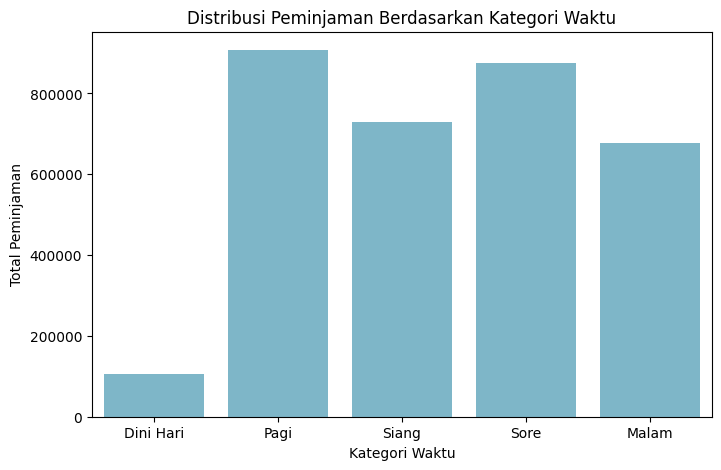

In [115]:
plt.figure(figsize=(8, 5))
sns.barplot(x="time_category", y="cnt", data=time_distribution, order=labels, color="#72BCD4")

plt.title("Distribusi Peminjaman Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Peminjaman")

plt.show()

Mengelompokkan frekuensi peminjaman sepeda berdasarkan kategori waktu dalam sehari

In [116]:
print(hour_df["time_category"].value_counts())

time_category
Pagi         4360
Dini Hari    4276
Malam        3640
Siang        2915
Sore         2188
Name: count, dtype: int64


Visualisasi frekuensi peminjaman sepeda berdasarkan kategori waktu dalam sehari

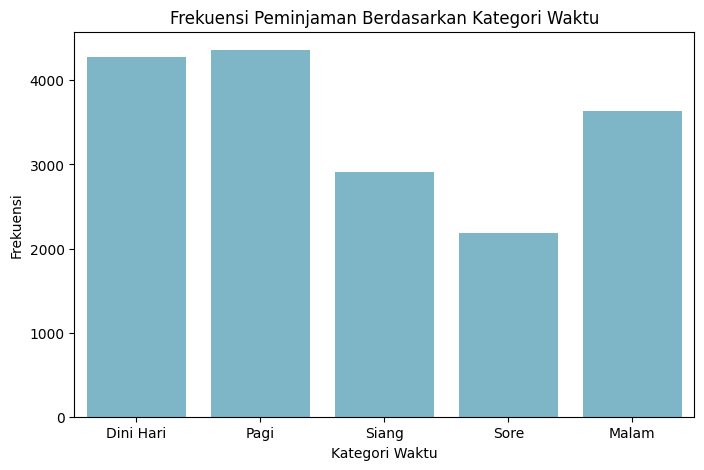

In [117]:
plt.figure(figsize=(8, 5))
sns.countplot(x="time_category", data=hour_df, order=labels, color="#72BCD4")
plt.title("Frekuensi Peminjaman Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Frekuensi")
plt.show()

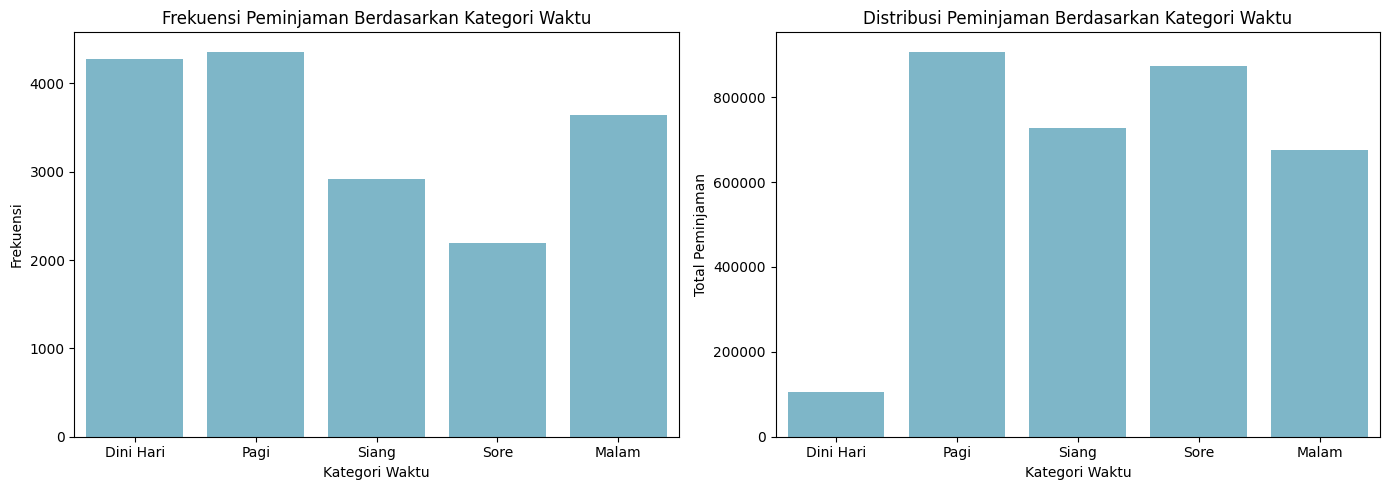

In [118]:
plt.figure(figsize=(14, 5))

# Distribusi Peminjaman (Frekuensi) Berdasarkan Kategori Waktu
plt.subplot(1, 2, 1)
sns.countplot(x="time_category", data=hour_df, order=labels, color="#72BCD4")
plt.title("Frekuensi Peminjaman Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Frekuensi")

# Total Peminjaman Berdasarkan Kategori Waktu
plt.subplot(1, 2, 2)
sns.barplot(x="time_category", y="cnt", data=time_distribution, order=labels, color="#72BCD4")
plt.title("Distribusi Peminjaman Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Peminjaman")

plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1

Berdasarkan visualisasi data, jumlah total peminjaman sepeda tertinggi terjadi pada **hari kerja (workday)** dibandingkan dengan akhir pekan (weekend) dan hari libur (holiday). Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai sarana transportasi pada hari kerja, kemungkinan untuk keperluan seperti bekerja atau sekolah. Sementara itu, total peminjaman pada akhir pekan dan hari libur lebih rendah, mengindikasikan bahwa penggunaan sepeda pada hari-hari tersebut mungkin lebih bersifat rekreasi daripada kebutuhan harian.

Untuk rata-rata peminjaman sepeda per hari menunjukkan bahwa setiap harinya, peminjaman pada hari kerja masih lebih tinggi dibandingkan akhir pekan dan hari libur, meskipun perbedaannya tidak terlalu signifikan. Rata-rata peminjaman pada akhir pekan dan hari libur relatif mirip, yang bisa jadi disebabkan oleh pola penggunaan sepeda yang lebih fleksibel di kedua kategori hari tersebut. Dengan demikian, layanan peminjaman sepeda dapat dioptimalkan dengan menyesuaikan jumlah sepeda yang tersedia dan jam operasional agar sesuai dengan lonjakan permintaan pada hari kerja.

- Pertanyaan 2

Grafik pertama menunjukkan distribusi **frekuensi peminjaman** berdasarkan kategori waktu. Peminjaman paling sering terjadi pada dini hari dan pagi, dengan jumlah yang hampir sama. Sementara itu, frekuensi peminjaman menurun pada siang dan mencapai titik terendah di sore hari, sebelum kembali meningkat pada malam hari. Pola ini menunjukkan bahwa pengguna lebih aktif melakukan peminjaman pada awal hari dan menjelang malam, sementara pada siang dan sore hari aktivitas peminjaman cenderung berkurang.

Grafik kedua menggambarkan **total peminjaman** berdasarkan kategori waktu. Meskipun frekuensi peminjaman di sore hari tergolong rendah, total peminjaman justru tinggi, mendekati angka peminjaman pada pagi hari. Sebaliknya, dini hari memiliki frekuensi peminjaman yang tinggi, tetapi total peminjamannya jauh lebih rendah dibandingkan pagi dan sore. Hal ini menunjukkan bahwa meskipun jumlah transaksi peminjaman lebih banyak pada dini hari, frekuensi peminjaman lebih besar terjadi pada pagi dan sore. Insight ini mengindikasikan bahwa frekuensi peminjaman tidak selalu berkorelasi dengan total peminjaman.

## Analisis Lanjutan (Opsional)

Memeriksa apakah terdapat perbedaan signifikan antara **frekuensi peminjaman** dan **total peminjaman**

**Menganalisis hubungan antara frekuensi peminjaman dan total peminjaman berdasarkan kategori waktu.**

Menghitung total peminjaman berdasarkan kategori waktu.

In [119]:
total_peminjaman = hour_df.groupby('time_category', observed=True)['cnt'].sum().reset_index()

Menghitung jumlah transaksi peminjaman (frekuensi peminjaman) berdasarkan kategori waktu.

In [120]:
frekuensi_peminjaman = hour_df['time_category'].value_counts().reset_index()
frekuensi_peminjaman.columns = ['time_category', 'frekuensi_peminjaman']

Menggabungkan dua dataframe, yaitu total_peminjaman dan frekuensi_peminjaman, berdasarkan kolom 'time_category' menggunakan metode inner join.

In [121]:
merged_df = pd.merge(total_peminjaman, frekuensi_peminjaman, on='time_category', how='inner')

Menghitung korelasi antara frekuensi peminjaman dan total peminjaman menggunakan dua metode korelasi yang berbeda: Pearson dan Spearman.

In [122]:
pearson_corr = merged_df[['frekuensi_peminjaman', 'cnt']].corr(method='pearson')
spearman_corr = merged_df[['frekuensi_peminjaman', 'cnt']].corr(method='spearman')

print("Korelasi Pearson:\n", pearson_corr)
print("Korelasi Spearman:\n", spearman_corr)

Korelasi Pearson:
                       frekuensi_peminjaman       cnt
frekuensi_peminjaman              1.000000 -0.447819
cnt                              -0.447819  1.000000
Korelasi Spearman:
                       frekuensi_peminjaman  cnt
frekuensi_peminjaman                   1.0  0.0
cnt                                    0.0  1.0


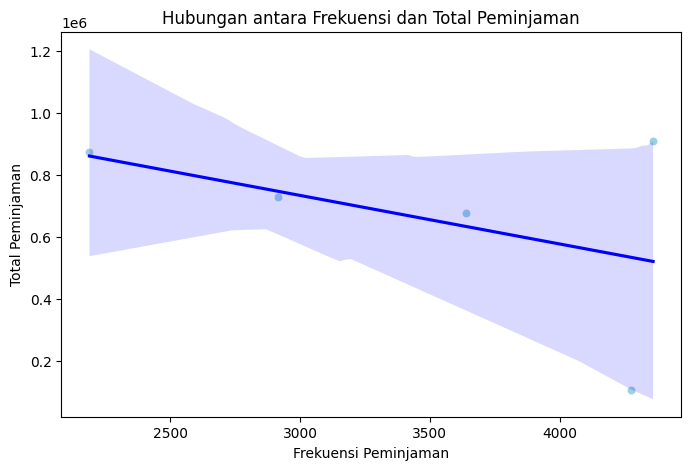

In [123]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=hourly_category_stats, x="frekuensi_peminjaman", y="total_peminjaman", color="#72BCD4", alpha=0.7)

sns.regplot(data=hourly_category_stats, x="frekuensi_peminjaman", y="total_peminjaman", scatter=False, color="blue")

plt.xlabel("Frekuensi Peminjaman")
plt.ylabel("Total Peminjaman")
plt.title("Hubungan antara Frekuensi dan Total Peminjaman")

plt.show()

**Menganalisis hubungan antara frekuensi peminjaman dan total peminjaman sepeda berdasarkan jam (hr).**

Menghitung frekuensi peminjaman sepeda berdasarkan jam (hr) dan menambahkannya ke dataset utama (hour_df).

In [124]:
hourly_freq = hour_df.groupby("hr")["cnt"].count().reset_index()
hourly_freq.rename(columns={"cnt": "frekuensi_peminjaman"}, inplace=True)

# Gabungkan dengan dataset utama
hour_df = hour_df.merge(hourly_freq, on="hr", how="left")

Membuat scatter plot (diagram pencar) yang menunjukkan hubungan antara frekuensi peminjaman dan total peminjaman sepeda.

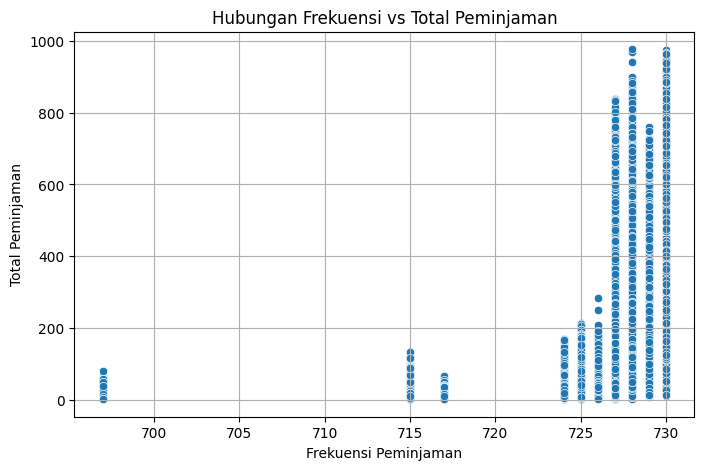

In [125]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=hour_df, x='frekuensi_peminjaman', y='cnt')
plt.title("Hubungan Frekuensi vs Total Peminjaman")
plt.xlabel("Frekuensi Peminjaman")
plt.ylabel("Total Peminjaman")
plt.grid(True)
plt.show()

**Menganalisis rata-rata peminjaman sepeda berdasarkan kategori waktu**

Menggabungkan total peminjaman dan jumlah baris untuk setiap kategori waktu

In [126]:
time_counts = hour_df["time_category"].value_counts().reset_index()
time_counts.columns = ["time_category", "count"]

Menggabungkan dengan total peminjaman

In [127]:
time_analysis = time_distribution.merge(time_counts, on="time_category")

Menghitung rata-rata peminjaman per kategori waktu

In [128]:
time_analysis["avg_peminjaman"] = time_analysis["cnt"] / time_analysis["count"]
print(time_analysis)

  time_category     cnt  count  avg_peminjaman
0     Dini Hari  106509   4276       24.908559
1          Pagi  907319   4360      208.100688
2         Siang  728134   2915      249.788679
3          Sore  874380   2188      399.625229
4         Malam  676337   3640      185.806868


Visualisasi rata-rata peminjaman per kategori waktu

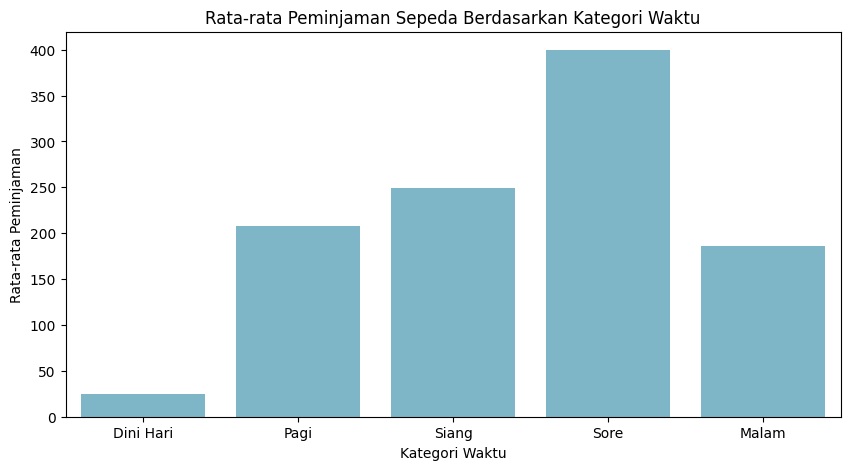

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x="time_category", y="avg_peminjaman", data=time_analysis, order=["Dini Hari", "Pagi", "Siang", "Sore", "Malam"], color="#72BCD4")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

- Insight Analisis Lanjutan

Dari hasil **menganalisis hubungan antara frekuensi peminjaman dan total peminjaman berdasarkan kategori waktu**, menunjukkan Korelasi Pearson Korelasi antara frekuensi_peminjaman dan cnt (total peminjaman) adalah -0.4478, yang berarti ada korelasi negatif sedang. Artinya, semakin tinggi frekuensi peminjaman, total peminjaman cenderung berkurang, atau sebaliknya. Ini menunjukkan bahwa **jumlah peminjaman tidak selalu berbanding lurus dengan banyaknya transaksi peminjaman**. Untuk Korelasi Spearman Hasilnya 0.0, yang berarti tidak ada korelasi monotonic (hubungan yang tetap meningkat atau menurun). Ini bisa terjadi jika data memiliki banyak nilai yang sama (ties), atau distribusi datanya tidak mengikuti pola tertentu. Sejalan dengan visualisasi scatter plot yang ditampilkan:  

- **Hubungan Negatif** → Garis regresi merah menunjukkan adanya **korelasi negatif** antara frekuensi peminjaman dan total peminjaman. Artinya, ketika frekuensi peminjaman meningkat, total peminjaman cenderung menurun, dan sebaliknya.  
- **Sebaran Data** → Titik-titik biru menunjukkan adanya variasi dalam hubungan ini. Beberapa titik yang jauh dari garis tren mengindikasikan bahwa hubungan antara kedua variabel tidak sepenuhnya linear.  
- **Interval Kepercayaan** → Area merah di sekitar garis tren merepresentasikan **interval kepercayaan**. Semakin lebar area merah, semakin besar tingkat ketidakpastian dalam hubungan antara frekuensi peminjaman dan total peminjaman.

Adapun dari hasil **Menganalisis hubungan antara frekuensi peminjaman dan total peminjaman sepeda berdasarkan jam (hr)**, menunjukkan **Hubungan Antara Frekuensi Peminjaman dan Total Peminjaman Tidak Linear**, dimana Data menunjukkan pola clustering pada nilai tertentu, dengan sebagian besar peminjaman terkonsentrasi di frekuensi 725–730, serta kelompok kecil di sekitar 698 dan 715. Distribusi total peminjaman tidak merata, di mana frekuensi tinggi tidak selalu berbanding lurus dengan jumlah peminjaman, menunjukkan variasi antar kategori waktu.

Terakhir, untuk hasil **Menganalisis rata-rata peminjaman sepeda berdasarkan kategori waktu**, menunjukkan Peminjaman sepeda tertinggi terjadi pada sore hari, kemungkinan karena aktivitas pulang kerja, olahraga, atau rekreasi. Siang dan pagi juga menunjukkan angka peminjaman tinggi, terutama untuk keperluan kerja atau kuliah. Malam hari memiliki peminjaman lebih rendah, sementara dini hari menjadi waktu dengan peminjaman paling sedikit karena faktor keamanan dan minimnya aktivitas. Secara keseluruhan, sore hari adalah puncak peminjaman, sedangkan dini hari yang terendah.

# Conclusion

- Pertanyaan 1 : **Bagaimana distribusi jumlah peminjaman sepeda pada hari kerja, akhir pekan, dan hari libur?**

1. Jumlah total peminjaman sepeda tertinggi terjadi pada **hari kerja (workday)** dibandingkan dengan akhir pekan (weekend) dan hari libur (holiday). Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai sarana transportasi pada hari kerja, kemungkinan untuk keperluan seperti bekerja atau sekolah.
2. Total peminjaman pada akhir pekan dan hari libur lebih rendah, mengindikasikan bahwa penggunaan sepeda pada hari-hari tersebut mungkin lebih bersifat rekreasi daripada kebutuhan harian.
3. Untuk rata-rata peminjaman sepeda per hari menunjukkan linear dengan Jumlah total peminjaman, dimana setiap harinya peminjaman pada hari kerja masih lebih tinggi dibandingkan akhir pekan dan hari libur, meskipun perbedaannya tidak terlalu signifikan.
4. Rata-rata peminjaman pada akhir pekan dan hari libur relatif mirip, yang bisa jadi disebabkan oleh pola penggunaan sepeda yang lebih fleksibel di kedua kategori hari tersebut.

   Dengan demikian, layanan peminjaman sepeda dapat dioptimalkan dengan menyesuaikan jumlah sepeda yang tersedia dan jam operasional agar sesuai dengan lonjakan permintaan pada hari kerja.

- Pertanyaan 2 : **Bagaimana pola peminjaman berdasarkan kategori waktu (jam), dan apakah frekuensi peminjaman selalu berbanding lurus dengan total jumlah peminjaman di setiap kategori waktu?**

  **Bagaimana pola peminjaman berdasarkan kategori waktu (jam)?**

1. Peminjaman paling sering terjadi pada pagi hari, dengan jumlah yang tinggi, diikuti oleh sore hari yang mendekati angka peminjaman pada pagi hari.  
2. Selanjutnya, peminjaman terjadi dalam jumlah lebih sedikit pada siang dan malam hari.  
3. Total peminjaman pada dini hari tercatat sebagai yang paling rendah dibandingkan dengan pagi dan sore hari.

  **Apakah frekuensi peminjaman selalu berbanding lurus dengan total jumlah peminjaman di setiap kategori waktu?**

  Berdasarkan visualisasi data, meskipun frekuensi peminjaman tinggi pada dini hari, total peminjaman justru lebih rendah dibandingkan pagi dan sore, yang menunjukkan bahwa transaksi peminjaman di dini hari cenderung lebih kecil dalam jumlah per transaksi. Untuk melihat apakah terdapat perbedaan signifikan antara frekuensi peminjaman dengan total jumlah peminjaman di setiap kategori waktu akan dianalisis di analisis lanjutan.



## Conclusion Analisis Lanjutan

1. Frekuensi peminjaman tidak selalu mencerminkan total peminjaman, karena terdapat faktor lain yang memengaruhinya. Artinya, frekuensi peminjaman selalu berbanding lurus dengan total jumlah peminjaman di setiap kategori waktu.
2. Ada korelasi negatif sedang, artinya ketika frekuensi peminjaman tinggi, total peminjaman cenderung lebih rendah, atau sebaliknya.Faktor lain seperti durasi penggunaan sepeda, preferensi waktu tertentu, atau pola aktivitas pengguna bisa memengaruhi hubungan ini.
3. Selain itu, berdasarkan rata-rata peminjaman yang menggabungkan frekuensi dan total peminjaman, terlihat bahwa sore hari memiliki angka yang cukup tinggi.

In [130]:
day_df.to_csv("day_data.csv", index=False)

In [131]:
hour_df.to_csv("hour_data.csv", index=False)